In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('house.csv')
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [4]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [5]:
data = data.drop(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE'], axis=1)
#axis=0 refers to action perform on row, axis=1 refers to action perform on column 
data

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,1300.236407,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,2,1275.000000,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,2,933.159722,"Jigani,Bangalore",12.778033,77.632191,43.0
3,2,929.921143,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,2,999.009247,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...
29446,3,2500.000000,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,2,769.230769,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,2,1022.641509,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,2,927.079009,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [6]:
data.isna().sum()      #checks for missing values (NaNs) in dataset
#data=data.dropna()

BHK_NO.                  0
SQUARE_FT                0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
data.shape

(29451, 6)

In [8]:
data['BHK_NO.'].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11],
      dtype=int64)

# Feature Engineering

In [10]:
data['BHK_NO.'].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11],
      dtype=int64)

In [16]:
data[data['BHK_NO.']>15]

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
3466,20,348.863897,"Rat,Ratnagiri",16.983330,73.300000,15.2
13440,17,11000.343760,"Karanodai,Chennai",13.252330,80.163376,320.0
20745,20,7000.000000,"Hunasamaranahalli,Bangalore",13.143000,77.619000,350.0
26200,20,11983.122360,"Ashoknagar,Udaipur",24.583330,73.683330,710.0
29187,20,16860.563140,"Seethammadhara,Visakhapatnam",17.741878,83.308875,2000.0


In [18]:
data['SQUARE_FT'].unique()

array([1300.236407 , 1275.       ,  933.1597222, ..., 1022.641509 ,
        927.0790093,  896.7741935])

In [21]:
data.head(10)

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,1300.236407,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,2,1275.000000,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,2,933.159722,"Jigani,Bangalore",12.778033,77.632191,43.0
3,2,929.921143,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,2,999.009247,"New Town,Kolkata",22.592200,88.484911,60.5
5,3,1250.000000,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,3,1495.053957,"Sodala,Jaipur",26.916347,75.795600,66.5
7,3,1181.012946,"Kharar,Mohali",30.740000,76.650000,52.0
8,2,1040.000000,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,2,879.120879,"Chromepet,Chennai",12.951610,80.140970,36.0


In [22]:
data1=data.copy()
data1['price_per_sqft']=data1['TARGET(PRICE_IN_LACS)']*1000000/data1['SQUARE_FT']
data1.head()

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),price_per_sqft
0,2,1300.236407,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,42299.999988
1,2,1275.000000,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,40000.000000
2,2,933.159722,"Jigani,Bangalore",12.778033,77.632191,43.0,46080.000001
3,2,929.921143,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,67209.999999
4,2,999.009247,"New Town,Kolkata",22.592200,88.484911,60.5,60560.000002


In [24]:
len(data1['ADDRESS'].unique())

6899

In [25]:
data1['ADDRESS']=data1['ADDRESS'].apply(lambda x: x.strip())
location_stats=data1.groupby('ADDRESS')['ADDRESS'].agg('count').sort_values(ascending=False)
location_stats

ADDRESS
Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
Lower Thather Bantalab,Jammu       1
Lower Bharari,Shimla               1
Louis Wadi,Maharashtra             1
Lottegolla Halli,Bangalore         1
yelahanka/Jakkur,Bangalore         1
Name: ADDRESS, Length: 6899, dtype: int64

In [26]:
len(location_stats[location_stats<=10])

6326

In [27]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

ADDRESS
Action area 1A,Kolkata          10
Madhavaram,Chennai              10
Vanagaram,Chennai               10
Viman Nagar,Pune                10
Nalasopara (West),Lalitpur      10
                                ..
Lower Thather Bantalab,Jammu     1
Lower Bharari,Shimla             1
Louis Wadi,Maharashtra           1
Lottegolla Halli,Bangalore       1
yelahanka/Jakkur,Bangalore       1
Name: ADDRESS, Length: 6326, dtype: int64

In [28]:
len(data1['ADDRESS'].unique())

6899

In [29]:
data1['ADDRESS']=data1['ADDRESS'].apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data1['ADDRESS'].unique())

574

In [30]:
data1.head(10)

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),price_per_sqft
0,2,1300.236407,other,12.969910,77.597960,55.0,42299.999988
1,2,1275.000000,other,12.274538,76.644605,51.0,40000.000000
2,2,933.159722,"Jigani,Bangalore",12.778033,77.632191,43.0,46080.000001
3,2,929.921143,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,67209.999999
4,2,999.009247,"New Town,Kolkata",22.592200,88.484911,60.5,60560.000002
5,3,1250.000000,other,10.033280,76.282571,42.0,33600.000000
6,3,1495.053957,other,26.916347,75.795600,66.5,44479.999995
7,3,1181.012946,"Kharar,Mohali",30.740000,76.650000,52.0,44029.999990
8,2,1040.000000,"Bileshivale,Bangalore",13.054202,77.674002,41.6,40000.000000
9,2,879.120879,"Chromepet,Chennai",12.951610,80.140970,36.0,40950.000001


In [31]:
data1[data1['SQUARE_FT']/data1['BHK_NO.']<300].head()
#It filters the data1 DataFrame to find rows where the ratio of 'total_sqft' to 'BHK' is less than 300

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),price_per_sqft
65,2,573.876915,"Sector 86 Faridabad,Faridabad",28.406388,77.342588,22.1,38509.999999
80,3,767.018217,other,20.742166,80.104602,240.0,312899.999993
128,2,398.262129,other,26.707154,80.982346,11.0,27619.999999
167,1,265.003393,"Andheri (East),Lalitpur",19.114500,72.871200,82.0,309430.000042
175,2,499.636628,"Hiranandani Estate,Maharashtra",19.255098,72.981527,110.0,220160.000003


In [32]:
data2=data1[~(data1['SQUARE_FT']/data1['BHK_NO.']<300)]
data2.head(10)

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),price_per_sqft
0,2,1300.236407,other,12.969910,77.597960,55.0,42299.999988
1,2,1275.000000,other,12.274538,76.644605,51.0,40000.000000
2,2,933.159722,"Jigani,Bangalore",12.778033,77.632191,43.0,46080.000001
3,2,929.921143,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,67209.999999
4,2,999.009247,"New Town,Kolkata",22.592200,88.484911,60.5,60560.000002
5,3,1250.000000,other,10.033280,76.282571,42.0,33600.000000
6,3,1495.053957,other,26.916347,75.795600,66.5,44479.999995
7,3,1181.012946,"Kharar,Mohali",30.740000,76.650000,52.0,44029.999990
8,2,1040.000000,"Bileshivale,Bangalore",13.054202,77.674002,41.6,40000.000000
9,2,879.120879,"Chromepet,Chennai",12.951610,80.140970,36.0,40950.000001


In [33]:
data2.shape

(28665, 7)

## Outlier Removal Using Standard Deviation and Mean

In [34]:
data2["price_per_sqft"].describe().apply(lambda x:format(x,'f'))

count      28665.000000
mean       72758.351649
std        80008.200569
min           10.000000
25%        35349.999996
50%        50580.000004
75%        79220.000021
max      4666660.000084
Name: price_per_sqft, dtype: object

This code provides a formatted summary of the 'price_per_sqft' column’s descriptive statistics, converting each value to a string with a floating-point format.

In [36]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('ADDRESS'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data3=remove_pps_outliers(data2)
data3.shape

(23253, 7)

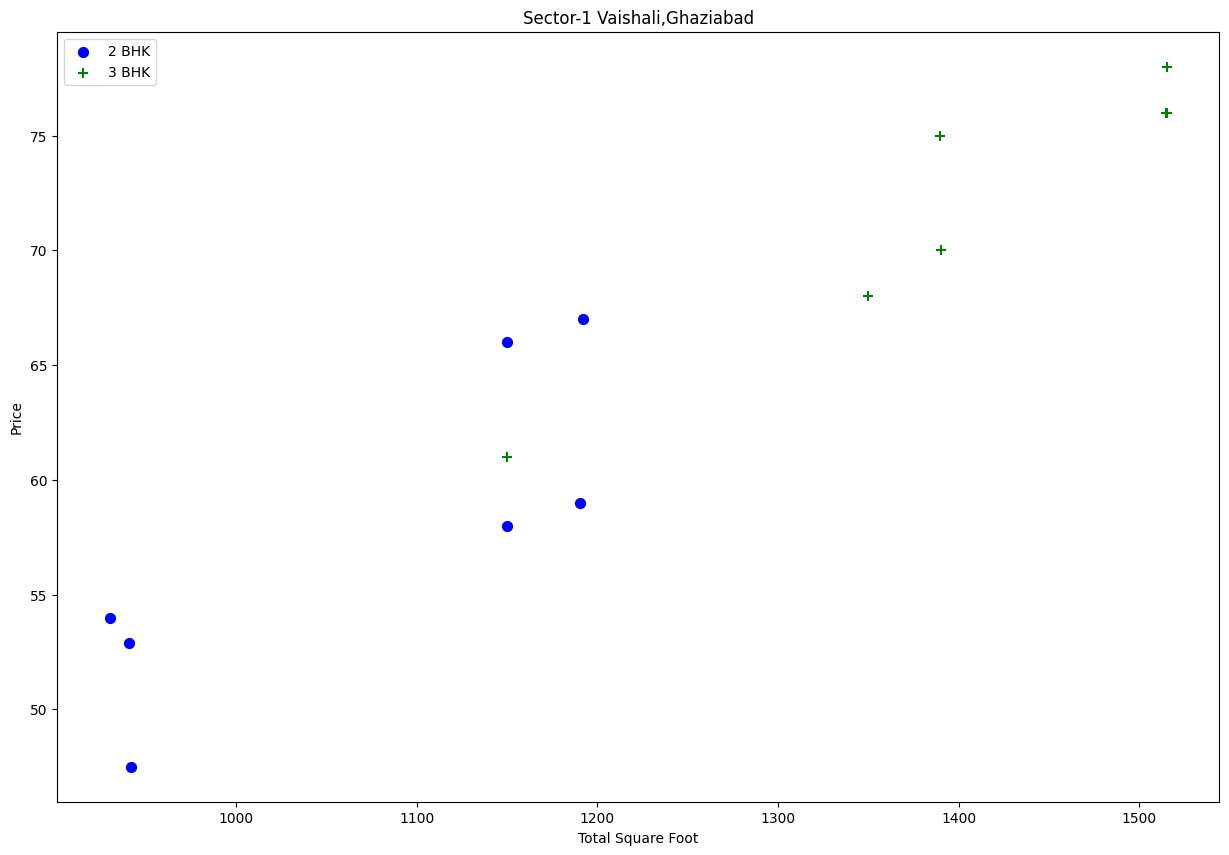

In [40]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df['ADDRESS']==location)&(df['BHK_NO.']==2)]
    bhk3=df[(df['ADDRESS']==location)&(df['BHK_NO.']==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['SQUARE_FT'],bhk2['TARGET(PRICE_IN_LACS)'],color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3['SQUARE_FT'],bhk3['TARGET(PRICE_IN_LACS)'],color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(data3,"Sector-1 Vaishali,Ghaziabad")

In [41]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('ADDRESS'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK_NO.'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK_NO.'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data4=remove_bhk_outliers(data3)
data4.shape

(14802, 7)

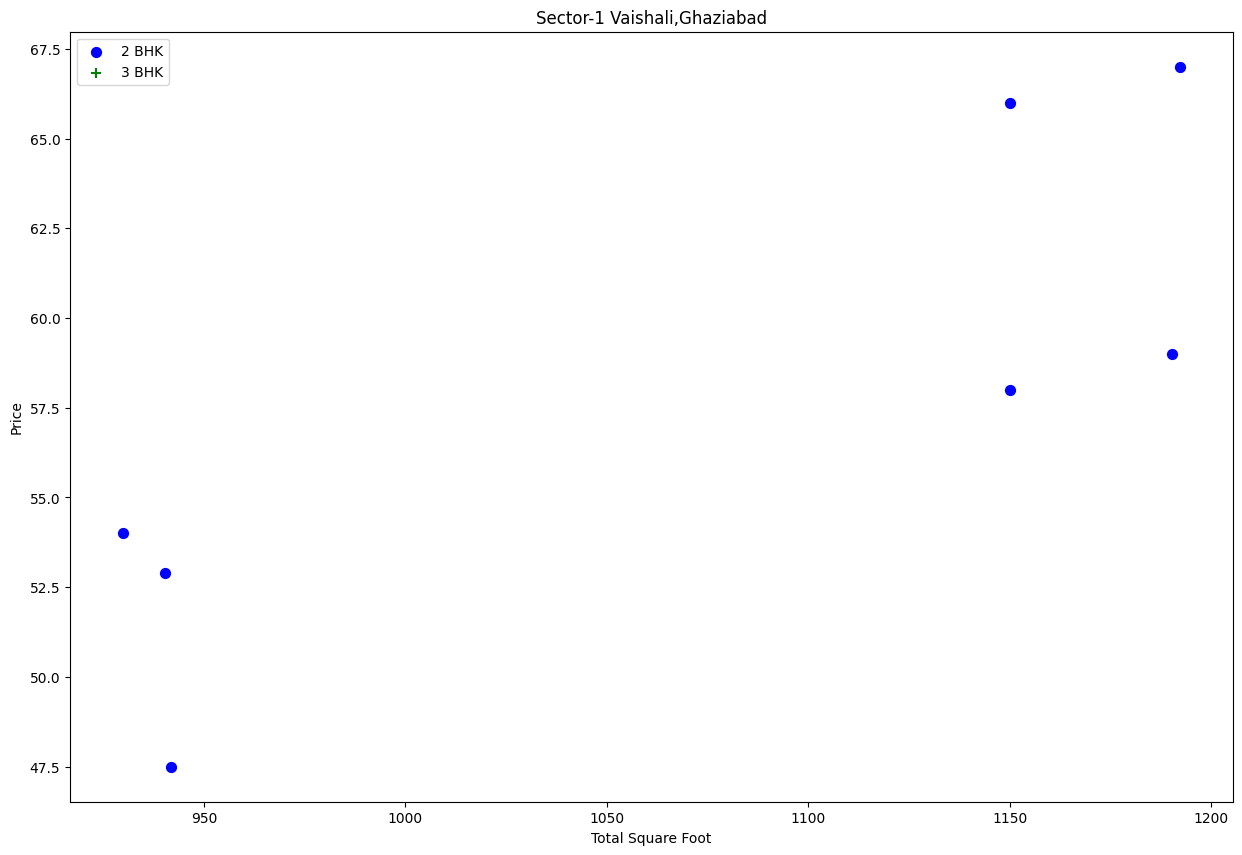

In [42]:
plot_scatter_chart(data4,"Sector-1 Vaishali,Ghaziabad")

Text(0, 0.5, 'Count')

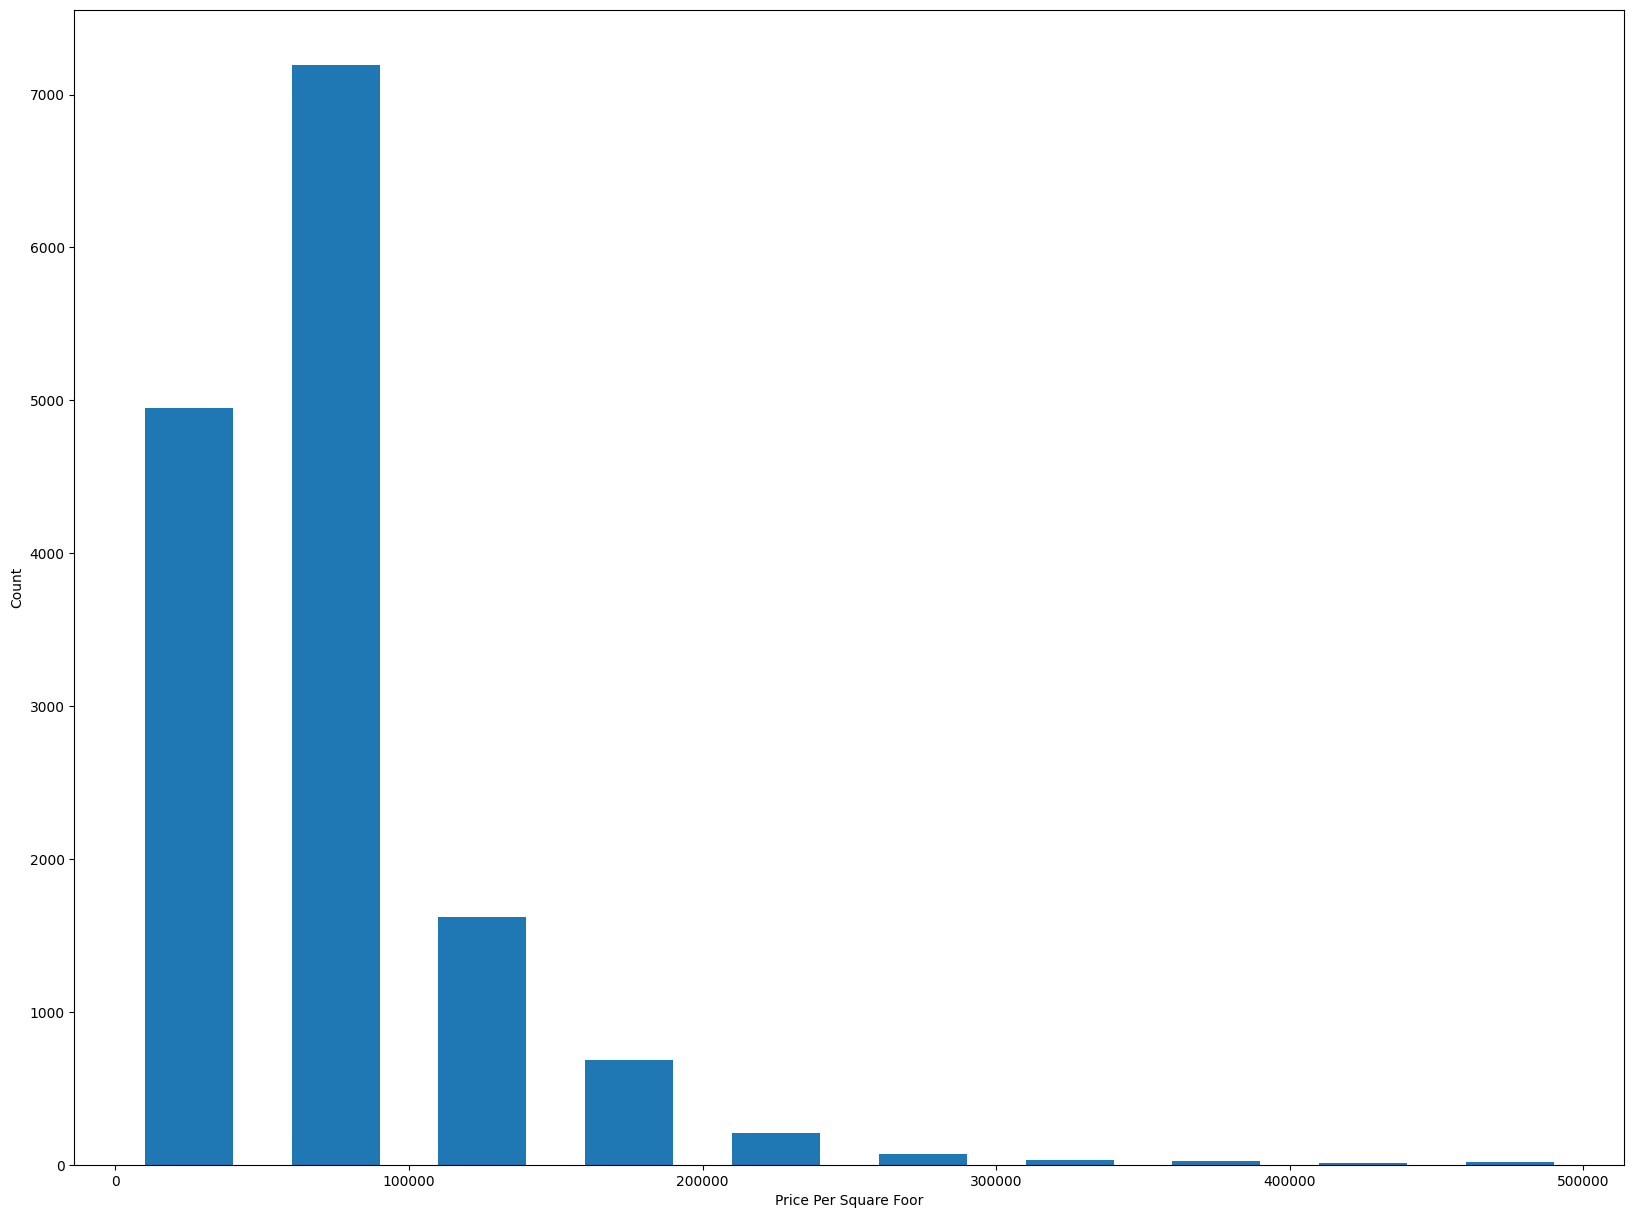

In [43]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

In [45]:
data5=data4.drop(['price_per_sqft'],axis='columns')
data5

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,3,1282.568807,"6th Phase JP Nagar,Bangalore",35.000000,136.000000,69.9
1,2,1200.087279,"6th Phase JP Nagar,Bangalore",35.000000,136.000000,55.0
2,2,1099.796334,"6th Phase JP Nagar,Bangalore",35.000000,136.000000,54.0
3,3,1439.884809,"6th Phase JP Nagar,Bangalore",35.000000,136.000000,120.0
4,2,1100.160440,"6th Phase JP Nagar,Bangalore",35.000000,136.000000,48.0
...,...,...,...,...,...,...
23247,3,1400.076717,"sector-121 Noida,Noida",28.602325,77.401994,73.0
23248,3,1958.991772,"sector-121 Noida,Noida",28.602325,77.401994,150.0
23249,3,1620.029455,"sector-121 Noida,Noida",28.602325,77.401994,110.0
23250,3,1952.870720,"sector-121 Noida,Noida",28.602325,77.401994,150.0


In [47]:
dummies=pd.get_dummies(data5['ADDRESS'])
dummies.head(10)

,"6th Phase JP Nagar,Bangalore","7th Phase JP Nagar,Bangalore","8th Phase JP Nagar,Bangalore","Action Area I,Kolkata","Action Area II,Kolkata","Adajan,Surat","Adityapur,Jamshedpur","Aerocity,Mohali","Ahinsa Khand 1,Ghaziabad","Ahinsa Khand 2,Ghaziabad",...,"Yelahanka,Bangalore","Yemlur,Bangalore","Yeshwanthpur,Bangalore","Zingabai Takli,Nagpur","Zirakpur,Chandigarh","Zirakpur,Mohali","kavesar,Lalitpur","kavesar,Mumbai",other,"sector-121 Noida,Noida"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
data6=pd.concat([data5,dummies.drop('other',axis='columns')],axis='columns')
data6.head()

,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),"6th Phase JP Nagar,Bangalore","7th Phase JP Nagar,Bangalore","8th Phase JP Nagar,Bangalore","Action Area I,Kolkata",...,"Worli,Mumbai","Yelahanka,Bangalore","Yemlur,Bangalore","Yeshwanthpur,Bangalore","Zingabai Takli,Nagpur","Zirakpur,Chandigarh","Zirakpur,Mohali","kavesar,Lalitpur","kavesar,Mumbai","sector-121 Noida,Noida"
0,3,1282.568807,"6th Phase JP Nagar,Bangalore",35.0,136.0,69.9,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1200.087279,"6th Phase JP Nagar,Bangalore",35.0,136.0,55.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1099.796334,"6th Phase JP Nagar,Bangalore",35.0,136.0,54.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1439.884809,"6th Phase JP Nagar,Bangalore",35.0,136.0,120.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1100.160440,"6th Phase JP Nagar,Bangalore",35.0,136.0,48.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
data7=data6.drop('ADDRESS',axis='columns')
data7.head()

,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),"6th Phase JP Nagar,Bangalore","7th Phase JP Nagar,Bangalore","8th Phase JP Nagar,Bangalore","Action Area I,Kolkata","Action Area II,Kolkata",...,"Worli,Mumbai","Yelahanka,Bangalore","Yemlur,Bangalore","Yeshwanthpur,Bangalore","Zingabai Takli,Nagpur","Zirakpur,Chandigarh","Zirakpur,Mohali","kavesar,Lalitpur","kavesar,Mumbai","sector-121 Noida,Noida"
0,3,1282.568807,35.0,136.0,69.9,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1200.087279,35.0,136.0,55.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1099.796334,35.0,136.0,54.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1439.884809,35.0,136.0,120.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1100.160440,35.0,136.0,48.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Model

In [50]:
data7.shape

(14802, 578)

In [51]:
X=data7.drop('TARGET(PRICE_IN_LACS)',axis='columns')
X.head()

,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,"6th Phase JP Nagar,Bangalore","7th Phase JP Nagar,Bangalore","8th Phase JP Nagar,Bangalore","Action Area I,Kolkata","Action Area II,Kolkata","Adajan,Surat",...,"Worli,Mumbai","Yelahanka,Bangalore","Yemlur,Bangalore","Yeshwanthpur,Bangalore","Zingabai Takli,Nagpur","Zirakpur,Chandigarh","Zirakpur,Mohali","kavesar,Lalitpur","kavesar,Mumbai","sector-121 Noida,Noida"
0,3,1282.568807,35.0,136.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1200.087279,35.0,136.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1099.796334,35.0,136.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1439.884809,35.0,136.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1100.160440,35.0,136.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
y=data7['TARGET(PRICE_IN_LACS)']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8488953597065606

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Define the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation
scores = cross_val_score(LinearRegression(), X, y, cv=kf)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())


Cross-validation scores: [0.83482378 0.86204627 0.84275301 0.84494241 0.86004189]
Mean score: 0.8489214708104258


## Randomized Search CV

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
import pandas as pd

def find_best_model_using_randomizedsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # No parameters for LinearRegression
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        rs = RandomizedSearchCV(config['model'], config['params'], n_iter=10, cv=cv, return_train_score=False, random_state=0, error_score='raise')
        try:
            rs.fit(X, y)
            scores.append({
                'model': algo_name,
                'best_score': rs.best_score_,
                'best_params': rs.best_params_
            })
        except Exception as e:
            print(f"Failed to fit model {algo_name}: {e}")

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Usage example
df = find_best_model_using_randomizedsearchcv(X, y)
print(df)


E:\Python\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


               model  best_score  \
0  linear_regression    0.830291   
1              lasso    0.811283   
2      decision_tree    0.963158   

                                         best_params  
0                                                 {}  
1                {'selection': 'cyclic', 'alpha': 1}  
2  {'splitter': 'random', 'criterion': 'friedman_...  


# Prediction

In [61]:
def price_predict(location,sqft,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=BHK
    if loc_index >=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [62]:
price_predict('sector-121 Noida,Noida',1000,4)

E:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10836.906797426622

In [63]:
price_predict('6th Phase JP Nagar,Bangalore',1200,3)

E:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


12980.470900724158